In [56]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
#Імпортує шари нейронних мереж, такі як Dense (пов'язаний) та Dropout (випадково вимикаючий).
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2, l1

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = fashion_mnist.load_data()

In [4]:
"""
Дана операція перетворює їх тип даних в 32-бітний
числовий формат (float32) і нормалізує значення
пікселів шляхом ділення на 255.0. Нормалізація полягає
в перетворенні значень пікселів так, щоб вони були в межах від 0 до 1.
"""
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_2 = x_train_2.astype('float32') / 255.0
x_test_2 = x_test_2.astype('float32') / 255.0

In [5]:
x_train.shape, x_train_2.shape

((60000, 28, 28), (60000, 28, 28))

In [6]:
# Kожне двовимірне зображення 28x28 стає одним вектором довжиною 784.
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train_2 = x_train.reshape(-1, 784)
x_test_2 = x_test.reshape(-1, 784)

In [9]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [8]:
"""
Kожна мітка замінюється вектором, де всі значення рівні 0,
за винятком одного значення, яке відповідає індексу класу.
Наприклад, якщо класи мають індекси від 0 до 9, то мітка "3"
буде перетворена у вектор [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
"""

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train_2 = keras.utils.to_categorical(y_train_2, num_classes)
y_test_2 = keras.utils.to_categorical(y_test_2, num_classes)


Вибір функції активації для обробки зображень може залежати від конкретної задачі та архітектури моделі. Ось деякі функції активації, які часто використовуються для зображень:

ReLU (Rectified Linear Activation): activation='relu'. Ця функція активації часто використовується в глибоких нейронних мережах для обробки зображень. Вона швидко збільшується і допомагає уникнути проблеми вицвітання градієнта.

Leaky ReLU: activation='leaky_relu'. Вона схожа на ReLU, але дозволяє невелике протікання негативних значень, що може допомогти уникнути проблем "мертвих" нейронів.

ELU (Exponential Linear Unit): activation='elu'. ELU є іншим варіантом ReLU з плавною функцією активації для негативних значень, і вона може працювати добре для зображень.

Sigmoid: activation='sigmoid'. Ця функція активації зазвичай використовується в останньому шарі для бінарної класифікації, де виходи моделі відображаються у вигляді ймовірностей.

Softmax: activation='softmax'. Ця функція активації також використовується у вихідному шарі для класифікації, але вона використовується для багатокласової класифікації та перетворює виходи в розподіл ймовірностей для кожного класу.

Яка функція активації є найкращою, зазвичай залежить від завдання і експериментів. Зазвичай ReLU та його варіанти є хорошими виборами для багатьох задач обробки зображень, але для конкретного завдання краще буде провести дослідження та вибрати оптимальний варіант.

In [30]:
# Sequential - це модель, в якій шари додаються один за одним в послідовному порядку.

model = Sequential()

"""
Додаємо перший шар Dense (повністю з'єднаний шар) до моделі. У цьому випадку:
512 вказує на кількість нейронів у шарі.
activation='relu' встановлює функцію активації для цього шару як ReLU (Rectified Linear Activation).
input_shape=(784,) вказує на форму вхідних даних, де (784,) означає, що кожен вхід матиме 784 значення
"""

model.add(Dense(512, activation='relu', input_shape=(784,)))

"""
Додаємо шар Dropout. Dropout - це метод регуляризації, який допомагає уникнути перенавчання моделі.
У цьому випадку 0.2 вказує на ймовірність "випадкового вимкнення" (деяких нейронів) під час навчання.
"""
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#  Цей шар видасть ймовірності належності вхідних даних до кожного з 10 класів.
model.add(Dense(num_classes, activation='softmax'))



In [71]:

# model_2 = Sequential()
# model_2.add(Dense(512, activation='relu', kernel_regularizer=l1(0.01), input_shape=(784,)))
# model_2.add(Dropout(0.2))
# model_2.add(Dense(256, activation='relu', kernel_regularizer=l1(0.01)))
# model_2.add(Dropout(0.2))
# model_2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
# model_2.add(Dropout(0.2))
# model_2.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
# model_2.add(Dropout(0.2))
# #  Цей шар видасть ймовірності належності вхідних даних до кожного з 10 класів.
# model_2.add(Dense(num_classes, activation='softmax'))



model_2 = Sequential()

"""
Додаємо перший шар Dense (повністю з'єднаний шар) до моделі. У цьому випадку:
512 вказує на кількість нейронів у шарі.
activation='relu' встановлює функцію активації для цього шару як ReLU (Rectified Linear Activation).
input_shape=(784,) вказує на форму вхідних даних, де (784,) означає, що кожен вхід матиме 784 значення
"""

model_2.add(Dense(512, activation='relu', input_shape=(784,)))

"""
Додаємо шар Dropout. Dropout - це метод регуляризації, який допомагає уникнути перенавчання моделі.
У цьому випадку 0.2 вказує на ймовірність "випадкового вимкнення" (деяких нейронів) під час навчання.
"""
model_2.add(Dropout(0.2))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
#  Цей шар видасть ймовірності належності вхідних даних до кожного з 10 класів.
model_2.add(Dense(num_classes, activation='softmax'))

In [32]:
# Цей код встановлює конфігурацію моделі для навчання!
"""
loss='categorical_crossentropy': Вказує функцію втрат для оптимізації.
У вашому випадку використовується категоріальна перехресна ентропія (categorical cross-entropy),
яка часто використовується для багатокласової класифікації.
"""

"""
optimizer=Adam(): Встановлює оптимізатор, який буде використовуватися для навчання моделі.
У цьому випадку використовується Adam, який є популярним алгоритмом оптимізації.
"""

# Інший Оптимайзер може бути RMSProp
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Якщо у вас є тільки два класи, ви також можете використовувати "binary_crossentropy" (бінарна перехресна ентропія).

Загалом, "categorical_crossentropy" є частою вибором для більшості завдань класифікації зображень, але деякі варіації або модифікації функції втрат також можуть бути використані в залежності від конкретного завдання та особливостей даних.


При роботі з нейронними мережами для класифікації зображень, крім "categorical_crossentropy" і "binary_crossentropy", можна також розглянути інші функції втрат, в залежності від конкретних вимог вашого завдання. Ось кілька інших можливих варіантів:



Sparse Categorical Crossentropy: Ця функція втрат використовується, коли ваша цільова змінна не кодується у форматі one-hot encoding. Вона приймає цілочисельні значення для класів замість векторів.



Mean Squared Error (MSE): MSE є функцією втрат, яка використовується для задач регресії. Вона допомагає зменшити середньоквадратичну помилку між прогнозованими і правильними значеннями.



Kullback-Leibler Divergence (KL Divergence): Ця функція втрат використовується в задачах генеративних моделей, таких як варіаційний автокодер (VAE) і генеративні приховані моделі (GAN).



Hinge Loss: Використовується в задачах бінарної класифікації, зазвичай в оцінці виборчих меж (SVM).



Huber Loss: Ця функція втрат також використовується в задачах регресії і є менш чутливою до викидів, ніж MSE.

In [72]:


model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [49]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=512,
          epochs=50,
          verbose=2,
          validation_data=(x_test, y_test))

batch_size=512: Цей параметр визначає, скільки вибірок обробляється в кожній ітерації навчання. У цьому випадку 512 вибірок обробляються разом в кожній партії перед оновленням ваг моделі.

epochs=50: Модель навчається протягом 50 епох, що означає, що вона пройде через весь набір навчальних даних 50 разів під час навчання.

verbose=2: Цей параметр контролює докладність інформації про хід навчання. З verbose=2 ви будете бачити більше деталей щодо ходу навчання для кожної епохи.

validation_data=(x_test, y_test): Це вказує дані для перевірки, на яких оцінюється продуктивність моделі після кожної епохи. x_test містить тестові вхідні дані, а y_test - відповідні мітки.

Під час навчання ваги моделі будуть оновлюватися з використанням навчальних даних (x_train і y_train) у спробі мінімізувати функцію втрати. Перевіряється продуктивність моделі на навчальних та валідаційних наборах даних протягом 50 епох.

In [ ]:
history_2 = model_2.fit(x_train_2, y_train_2,
          batch_size=512,
          epochs=50,
          verbose=2,
          validation_data=(x_test_2, y_test_2))

In [42]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8979
[0.3404894769191742, 0.8978999853134155]


Зазвичай результати evaluate включають два значення: втрати (loss) та точність (accuracy) моделі на тестових даних.

In [74]:
results_2 = model_2.evaluate(x_test_2, y_test_2)
print(results_2)

313/313 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8881
[0.3722512423992157, 0.8881000280380249]


1/1 [==============================] - 0s 55ms/step


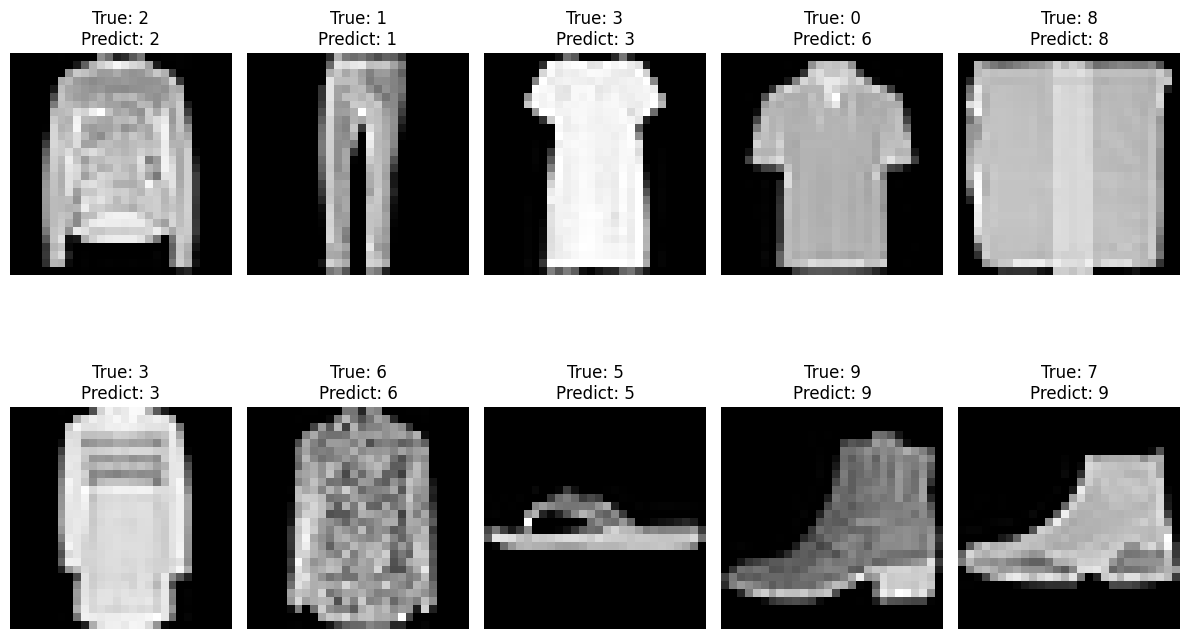

In [75]:
num_images = 10
random_indices = np.random.choice(range(len(x_test)), size=num_images, replace=False)
predictions = model.predict(x_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title("True: %s\nPredict: %s" % (np.argmax(y_test[index]), predicted_labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 17ms/step


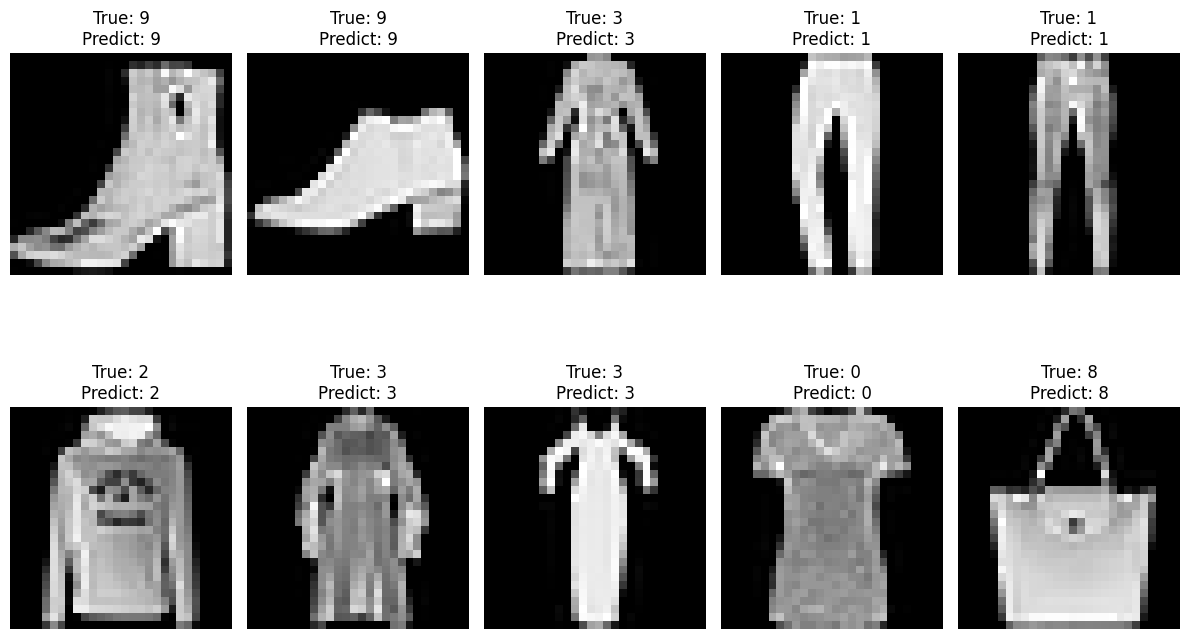

In [29]:
num_images = 10
random_indices = np.random.choice(range(len(x_test_2)), size=num_images, replace=False)
predictions = model.predict(x_test_2[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_2[index].reshape(28, 28), cmap='gray')
    plt.title("True: %s\nPredict: %s" % (np.argmax(y_test_2[index]), predicted_labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

Перша модель (з оптимізатором Адам):

Точність (accuracy) на тренувальних даних: приблизно 94.30%
Точність (accuracy) на валідаційних даних: приблизно 89.79%


Друга модель (з оптимізатором RMSprop):

Точність (accuracy) на тренувальних даних: приблизно 93.97%
Точність (accuracy) на валідаційних даних: приблизно 88.89%
Обидві моделі показали досить добрі результати на тренувальних та валідаційних даних, і обидві досягли високої точності. Однак перша модель (з оптимізатором Адам) досягла трохи вищої точності на валідаційних даних, ніж друга модель (з оптимізатором RMSprop).

Загалом, на основі наданих метрик можна сказати, що перша модель має перевагу в точності на валідаційних даних. Регуляризація kernel_regularizer=l1(0.01), kernel_regularizer=l1(0.001), kernel_regularizer=l1(0.0001) | kernel_regularizer=l2(0.01), kernel_regularizer=l2(0.001), kernel_regularizer=l2(0.0001) cприяло погіршенню праці моделі!